•<b>`Amiel Ryan James Nayve`</b><br>
•<b>`Royette Ramos`</b>

## INTRODUCTION

Throughout its brief existence, the cryptocurrency market has changed in an unpredictable and unprecedented manner. Since the release of the first anarchic cryptocurrency, Bitcoin, to the public in January 2009, more than 550 cryptocurrencies have been created, the vast majority of which have achieved relatively modest success [1]. Research on the industry remains limited. The majority of it is primarily focused on Bitcoin as opposed to a more wide range of cryptocurrencies, and it is being progressively overtaken by fluid industry changes, such as new coins, technological advancement, and increased government regulation of the markets. Despite the fact that the business's fluidity presents a study problem, a comprehensive examination of the bitcoin industry as a whole is important. The purpose of this study is to provide a simple analysis of the cryptocurrency and to help new enthusiast gain understanding to crypto.

## DATA DESCRIPTION

CoinGecko's APi is a independent sourced crypto data, including live prices, trading volume, exchange volumes, trading pairs, historical data, contract address data, crypto categories, crypto derivatives, and other visuals. bellow are the features used:

1. <b>`Date`</b> - Determines the date of a coin price
2. <b>`Price` </b> - Determines the price of a crypto coin
3. <b>`Volume`</b> - Sum total of actual trades taking place

## METHODOLOGY
<img src="methodology.drawio.png" align= "center" style="width: 700px align;"/>

## EXPLORATORY DATA ANALYSIS

In [21]:
import requests
import json
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib.pyplot import figure
sns.set()

coin = 'bitcoin'
vs_currency = 'usd'
time_start = 1609430400# jan 1 2021
time_end = 1653321600 #may 24 2022
url = f'https://api.coingecko.com/api/v3/coins/{coin}/market_chart/range?vs_currency={vs_currency}&from={time_start}&to={time_end}'
x = requests.get(url)
data = json.loads(x.text)

In [2]:
just_price = []
date = []
volume = [] 
for x in range(0, len(data['prices'] )):
    datee  = data['prices'][x][0]
    price  = data['prices'][x][1]
    v = data['total_volumes'][x][1]
    a = str( datetime.fromtimestamp(datee/1000.0))
    
    date.append( a[:10] )
    volume.append (v)
    just_price.append(price)

In [3]:
a = pd.DataFrame(date)
b = pd.DataFrame(just_price)
c = pd.DataFrame(volume)
df = pd.concat([a,b,c],axis=1)
df.columns = ['date','price','volume']
#print(len(df))
df.head()

,date,price,volume
0,2021-01-01,29022.418395,4.350352e+10
1,2021-01-02,29352.126792,3.408972e+10
2,2021-01-03,32163.824935,5.727344e+10
3,2021-01-04,33008.226203,1.788941e+11
4,2021-01-05,31515.575967,7.465717e+10


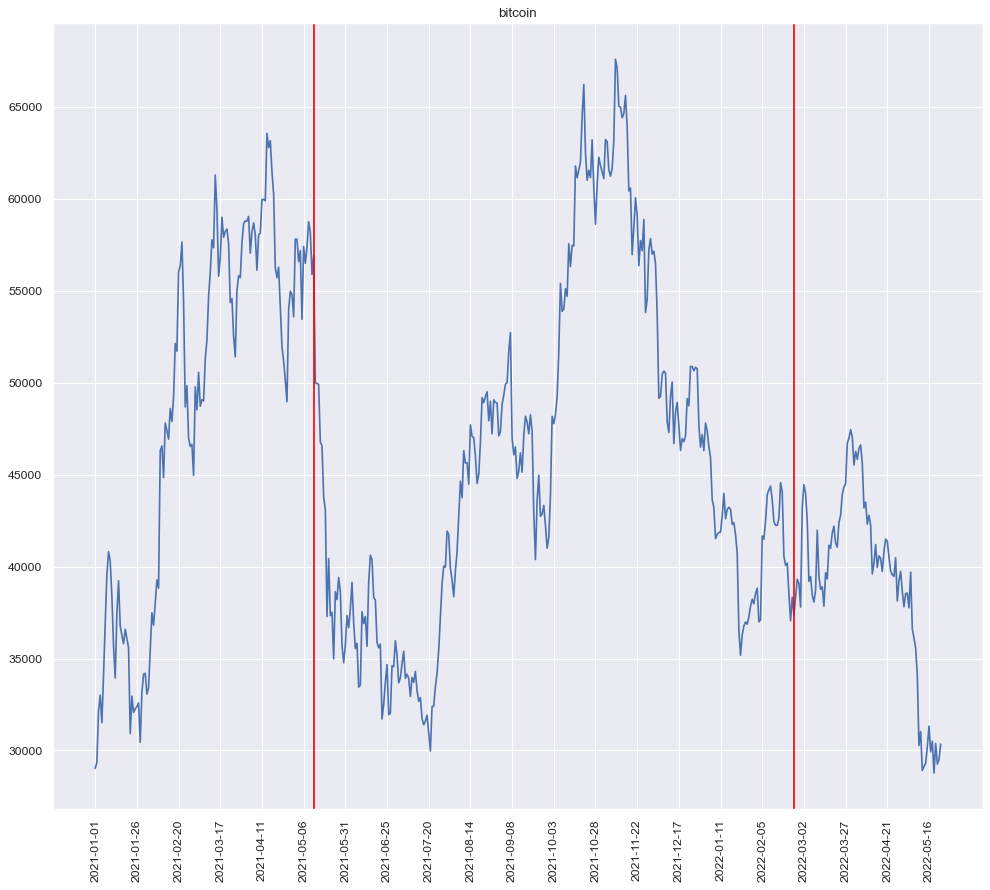

In [4]:
figure(figsize=(15, 13), dpi=80)
plt.plot( df['date'] ,just_price)
tw = '2021-05-12'
twb = '2021-03-24'
war_data = '2022-02-24'

plt.axvline(x=war_data,color="red")
plt.axvline(x=tw,color="red")

plt.title(coin)
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df['date'])+1, 25))    
plt.show()

In [5]:
#create macd
ShortEMA = df.price.ewm(span=12,adjust=False).mean()
LongEMA = df.price.ewm(span=26,adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9,adjust=False).mean()

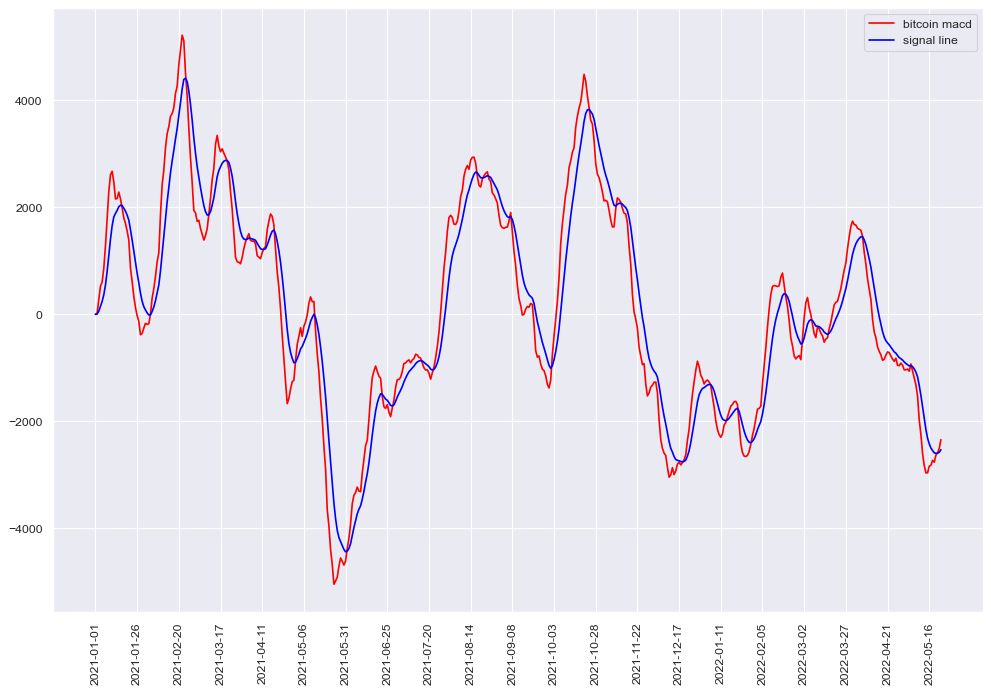

In [6]:
figure(figsize=(15, 10), dpi=80)
plt.plot( df.date,MACD , label = coin+" macd",color =  'red' )
plt.plot( df.date,signal , label = "signal line",color =  'blue' )
plt.xticks(np.arange(0, len(date)+1, 25))  
plt.xticks(rotation=90)
#plt.plot([x for x in range(508)],just_price)
plt.legend()
plt.show()

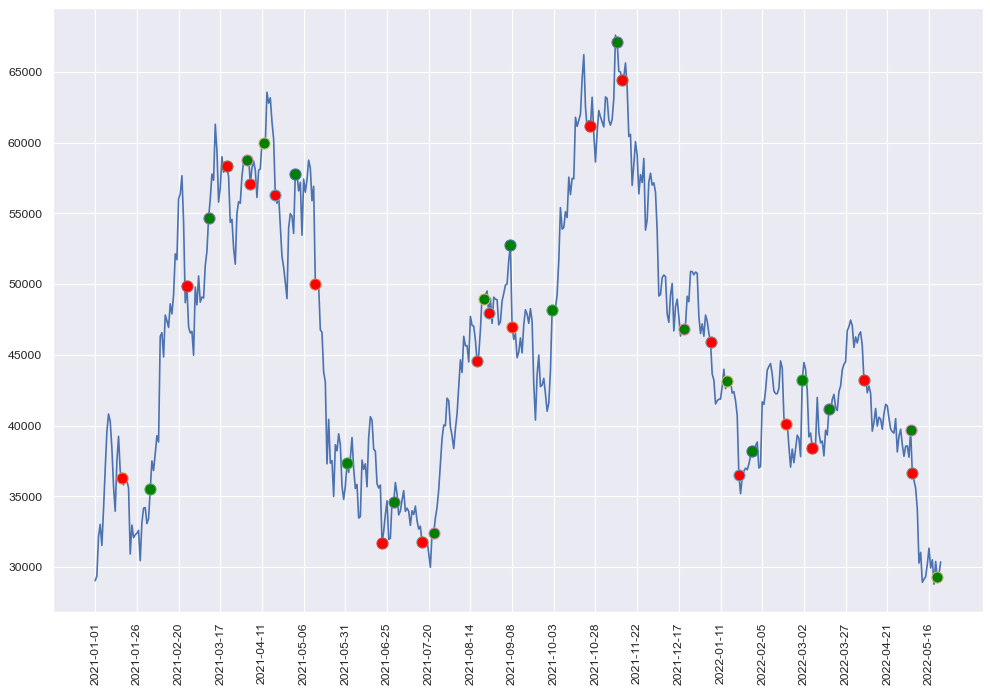

In [7]:
#plotting macd
figure(figsize=(15, 10), dpi=80)
current = 'buy'
target = 500
plt.plot([date[x] for x in range(len(just_price))],just_price)
for x in range(len(just_price)):
    if( MACD[x] > signal[x] and current != 'buy'):
        plt.plot(x, just_price[x], marker="o", markersize=10, markerfacecolor="green")
        current = 'buy'
    if( MACD[x] < signal[x]  and current != 'sell'): 
        plt.plot(x, just_price[x], marker="o", markersize=10, markerfacecolor="red")
        current = 'sell'
plt.xticks(np.arange(0, len(date)+1, 25))    
plt.xticks(rotation=90)
plt.show()

In [8]:
#creating rsi
delta = df['price'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()

up[ up <0] = 0
down[ down >0] = 0
time_period = 14
avg_gain = abs( up.rolling(window=time_period).mean() )

avg_loss = abs( down.rolling(window=time_period).mean() )
rs = avg_gain / avg_loss
rsi = 100.0 - (100.0/(1.0 + rs))
rsi = rsi.tolist()

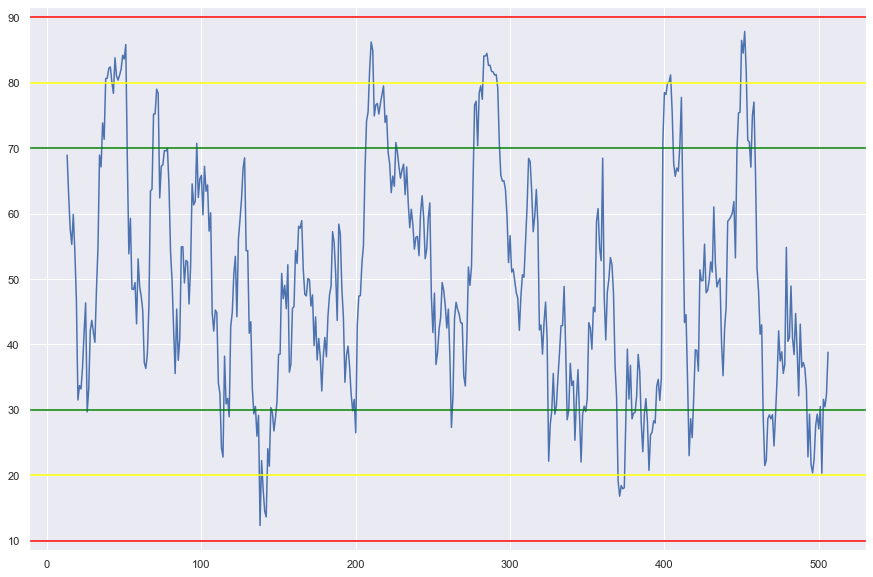

In [9]:
#calculating rsi
fig, ax = plt.subplots(1,1,figsize=(15, 10))
ax.plot(rsi)
ax.axhline(30,color='green')
ax.axhline(70,color='green')
ax.axhline(20,color='yellow')
ax.axhline(80,color='yellow')
ax.axhline(10,color='red')
ax.axhline(90,color='red')

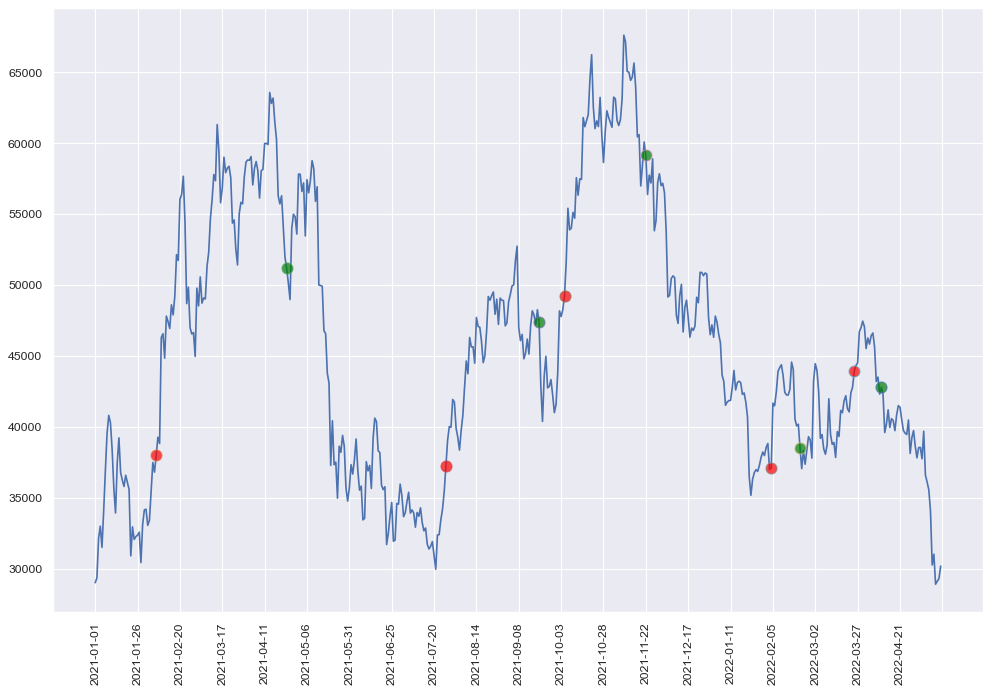

['sell', 'buy', 'sell', 'buy', 'sell', 'buy', 'sell', 'buy', 'sell', 'buy']

In [10]:
figure(figsize=(15, 10), dpi=80)
current = 'buy'
target = 500
plt.plot([date[x] for x in range(target)],just_price[:target])
stack = []
for x in range(target):
    #print(rsi[x])
    if( rsi[x] < 30 and current != 'buy' ):
        plt.plot(x, just_price[x], marker="o",alpha=0.7, markersize=10, markerfacecolor="green")
        current = 'buy'
        stack.append(current)
    if( rsi[x] > 70  and current != 'sell'):
        
        plt.plot(x, just_price[x], marker="o",alpha=0.7, markersize=10, markerfacecolor="red")
        current = 'sell'
        stack.append(current)
plt.xticks(np.arange(0, len(date)+1, 25))    
plt.xticks(rotation=90)
plt.show()
stack

10

In [12]:
def get_coin_sugg(coin):
    coin = coin
    vs_currency = 'usd'
    time_start = 1609430400# jan 1 2021
    time_end = 1653321600 #may 24 2022
    url = f'https://api.coingecko.com/api/v3/coins/{coin}/market_chart/range?vs_currency={vs_currency}&from={time_start}&to={time_end}'
    x = requests.get(url)
    data = json.loads(x.text)

    just_price = []
    date = []
    volume = [] 
    for x in range(0, len(data['prices'] )):
        datee  = data['prices'][x][0]
        price  = data['prices'][x][1]
        v = data['total_volumes'][x][1]
        a = str( datetime.fromtimestamp(datee/1000.0))
    
        date.append( a[:10] )
        volume.append (v)
        just_price.append(price)

    a = pd.DataFrame(date)
    b = pd.DataFrame(just_price)
    c = pd.DataFrame(volume)
    df = pd.concat([a,b,c],axis=1)
    df.columns = ['date','price','volume']

    #create macd
    ShortEMA = df.price.ewm(span=12,adjust=False).mean()
    LongEMA = df.price.ewm(span=26,adjust=False).mean()
    MACD = ShortEMA - LongEMA
    signal = MACD.ewm(span=9,adjust=False).mean()

    suggest_macd = ""
    #print( MACD[MACD.index[-1]] )
    #print(   )
    if( MACD[MACD.index[-1]] > signal[signal.index[-1]] ):
        #plt.plot(x, just_price[x], marker="o", markersize=10, markerfacecolor="green")
        suggest_macd = 'buy'
    elif( MACD[MACD.index[-1]] < signal[signal.index[-1]] ): 
        #plt.plot(x, just_price[x], marker="o", markersize=10, markerfacecolor="red")
        suggest_macd = 'sell'
        
    
    delta = df['price'].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()

    up[ up <0] = 0
    down[ down >0] = 0
    time_period = 14
    avg_gain = abs( up.rolling(window=time_period).mean() )

    avg_loss = abs( down.rolling(window=time_period).mean() )
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0/(1.0 + rs))
    rsi = rsi.tolist()
    
    #print( type(rsi) )
    suggest_rsi = ""
    #print(rsi)
    iterator = -1
    while( suggest_rsi == '' ):
        if( rsi[iterator] < 30):
            #plt.plot(x, just_price[x], marker="o",alpha=0.7, markersize=10, markerfacecolor="green")
            suggest_rsi = 'undervalued'
        elif( rsi[iterator] > 70  ):
            #plt.plot(x, just_price[x], marker="o",alpha=0.7, markersize=10, markerfacecolor="red")
            suggest_rsi = 'overvalued'
        else:
            iterator += -1
 
    return [coin,just_price[-1],suggest_macd , suggest_rsi ]

['monero', 187.13545824886566, 'buy', 'undervalued']

In [35]:
coin_list = ['bitcoin','ethereum','tether', 'usdcoin','bnb','ripple','solana','dogecoin','polkadot','dai',
             'tron','shiba inu', 'wrappedbitcoin', 'avalanche','litecoin','stellar','cronos','algorand',
             'cosmos','monero','bitcoincash', 'vechain', 'flow','thetanetwork','apecoin', 'axieinfinity',
             'filecoin']
df_suggest = pd.DataFrame(columns =["coin",'value',"macd","rsi"])
for x in coin_list:
    try:
        
        time.sleep( 2 )
        data = get_coin_sugg(x)
        print(data)
        time.sleep( 2 )
        xq =  pd.DataFrame( [data])
        xq.columns =["coin",'value',"macd","rsi"]
        df_suggest = df_suggest.append(xq)
        
    except:
        print(x," not found")
        
df_suggest   

['bitcoin', 30351.050417138096, 'buy', 'undervalued']
['ethereum', 2046.6463496545232, 'buy', 'undervalued']
['tether', 1.000241015724455, 'buy', 'undervalued']
usdcoin  not found
bnb  not found
['ripple', 0.4228608764476286, 'buy', 'undervalued']
['solana', 52.767400507738245, 'buy', 'undervalued']
['dogecoin', 0.08633708006410667, 'sell', 'undervalued']
['polkadot', 10.189629881421922, 'buy', 'undervalued']
['dai', 1.0010163866448412, 'buy', 'overvalued']
['tron', 0.07815744593918296, 'sell', 'overvalued']
shiba inu  not found
wrappedbitcoin  not found
avalanche  not found
['litecoin', 71.80883369609995, 'buy', 'undervalued']
['stellar', 0.13598686052748765, 'buy', 'undervalued']
cronos  not found
['algorand', 0.44456298567498953, 'sell', 'undervalued']
['cosmos', 11.427119100888095, 'buy', 'undervalued']
['monero', 187.13545824886566, 'buy', 'undervalued']
bitcoincash  not found
['vechain', 0.03213378902040251, 'buy', 'undervalued']
['flow', 2.9008622251360094, 'buy', 'undervalued']

,coin,value,macd,rsi
0,bitcoin,30351.050417,buy,undervalued
0,ethereum,2046.646350,buy,undervalued
0,tether,1.000241,buy,undervalued
0,ripple,0.422861,buy,undervalued
0,solana,52.767401,buy,undervalued
0,dogecoin,0.086337,sell,undervalued
0,polkadot,10.189630,buy,undervalued
0,dai,1.001016,buy,overvalued
0,tron,0.078157,sell,overvalued
0,litecoin,71.808834,buy,undervalued


## Insights, Conclusion, Recommendation

